# Feature Scalling: Z-Score Normalization

In [8]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("./dataset/oil_spill.csv")
df

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [10]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [11]:
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


In [12]:
X = df.drop(columns=["target"])
y = df["target"]

In [13]:
X

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,50,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,50,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,50,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,50,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32


In [14]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [15]:
X

array([[-1.24092248,  1.15238979,  1.34643407, ...,  3.68676672,
         0.38873035, -0.05837721],
       [-1.22552414, 11.38954577, -1.03327258, ...,  6.36218073,
         0.38776948, -0.6396642 ],
       [-1.21012579, -0.11281849,  1.2526453 , ...,  3.46046621,
         0.39545643, -0.09621246],
       ...,
       [ 1.85414469, -0.1651255 , -1.12327578, ..., -0.8513792 ,
         0.40506512, -0.68781815],
       [ 1.86954303, -0.16719707, -1.00510593, ..., -0.81220448,
         0.41083033, -0.61902679],
       [ 1.88494138, -0.16667918, -1.15230961, ..., -0.6135064 ,
         0.38008253, -0.6396642 ]])

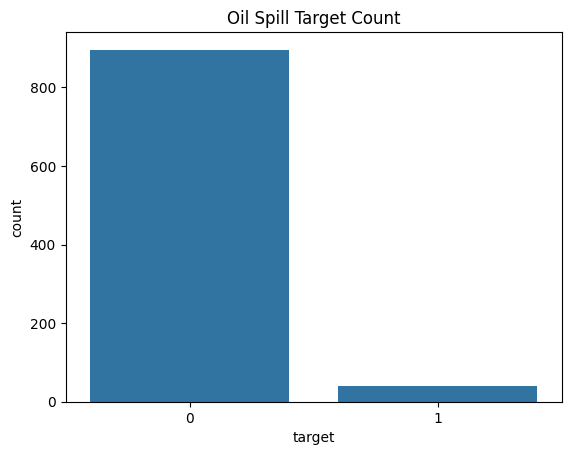

In [22]:
sns.countplot(x=y, )
plt.title("Oil Spill Target Count")
plt.show()

In [23]:
data = pd.DataFrame(X, columns=df.drop(("target"), axis=1).columns)
data["target"] = y
data

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,-1.240922,1.152390,1.346434,-0.793007,0.129657,1.469091,-0.185871,-0.345107,3.165389,-0.343460,...,1.913877,0.800597,0.950757,0.216514,-0.255448,-0.383248,3.686767,0.388730,-0.058377,1
1,-1.225524,11.389546,-1.033273,-0.057342,2.114766,14.374844,0.618905,-2.207407,7.100184,-2.226754,...,4.810555,15.485710,17.486286,11.381341,-0.878152,-0.383248,6.362181,0.387769,-0.639664,0
2,-1.210126,-0.112818,1.252645,-0.502492,0.085544,-0.125929,-0.222058,-0.498440,-0.073589,-0.454242,...,0.465538,-0.248340,-0.197438,-0.449905,0.858654,2.609278,3.460466,0.395456,-0.096212,1
3,-1.194727,0.449611,1.440556,-1.101091,-0.399705,0.583114,-0.066295,-0.322804,1.725979,-0.343460,...,5.101741,0.467147,0.370349,0.286675,1.654442,2.609278,4.336762,0.382004,-0.017102,1
4,-1.179329,-0.010794,0.419520,-0.823188,-1.039352,0.002691,-0.142604,-0.584864,-0.072364,-0.565024,...,0.385669,0.395889,0.481449,0.022483,-0.484237,-0.383248,3.072971,0.381043,-0.264751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,1.823348,-0.166161,-1.011076,-0.969479,1.122212,-0.175628,1.272638,0.337922,-0.374456,-0.565024,...,-0.551456,-0.241963,-0.319437,0.301430,-0.102259,-0.383248,-0.787088,0.399300,-0.594950,0
933,1.838746,-0.166679,-1.000403,-1.191058,1.651574,-0.177743,1.289945,0.293316,-0.380949,-0.565024,...,-0.648585,-0.346241,-0.197438,-0.399516,-0.619521,-0.383248,-0.529054,0.384887,-0.546796,0
934,1.854145,-0.165126,-1.123276,-0.846153,-1.326090,-0.171397,1.329279,2.456706,-0.378989,0.875143,...,-0.530830,-0.346241,-0.141260,-0.782856,-0.551879,-0.383248,-0.851379,0.405065,-0.687818,0
935,1.869543,-0.167197,-1.005106,-0.803208,-0.355592,-0.179858,1.310398,1.639859,-0.380949,0.321232,...,-0.530830,-0.346241,-0.309793,-0.240750,-0.108228,-0.383248,-0.812204,0.410830,-0.619027,0


<Axes: >

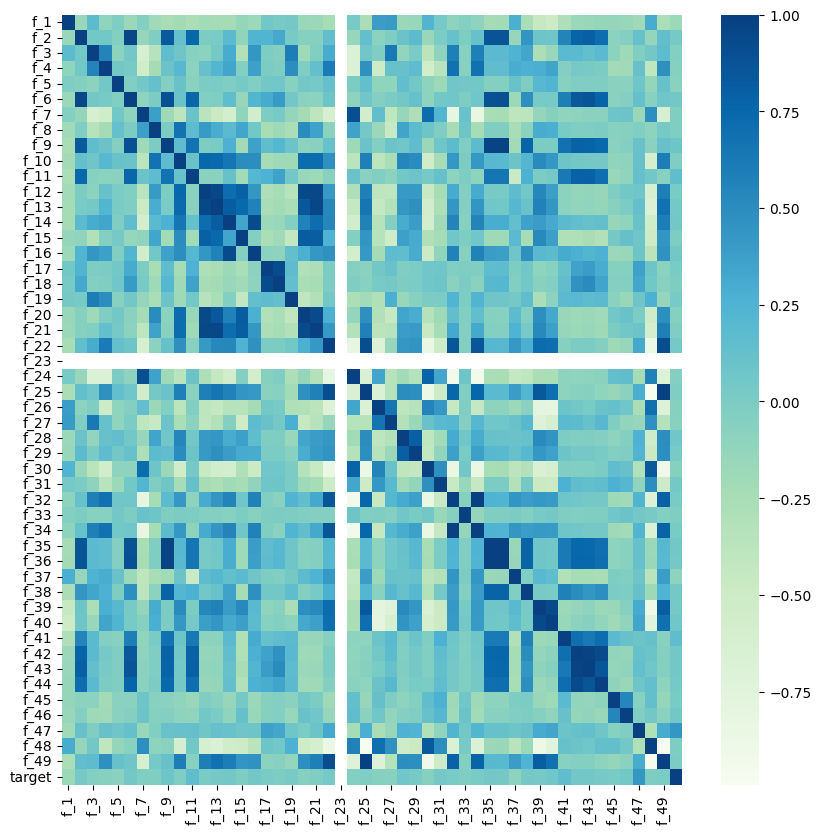

In [38]:
correlation = data.corr()

sns.color_palette("viridis", as_cmap=True)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=False, cmap="GnBu")